# 데이터 전처리

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

**두 리스트 열방향으로 합치기: 2차원 배열로**

In [4]:
fish_data=np.column_stack((fish_length,fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**라벨 데이터**

In [8]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [9]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로 훈련 데이터와 테스트 데이터 나누기

In [10]:
from sklearn.model_selection import train_test_split

**train_test_split(매개변수들)**
- *array : feature dataset, label dataset 
- test_size = None 
- train_size = None
- shuffle = True
- stratify = None
- random_state = None : seed값으로 생각하고 파라미터 사용

In [22]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,
                                                                 fish_target,
                                                                 random_state=42) 
# label의 도미와 빙어의 분포를 반영하여 split
# seed값으로 분리한 데이터 고정
# 시계열 데이터는 shuffle = False

In [14]:
test_input.shape

(13, 2)

In [17]:
train_target.shape

(36,)

In [18]:
train_target

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0.])

**데이터 분포를 반영한 분할**

In [23]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,
                                                                 fish_target,
                                                                 stratify=fish_target,
                                                                 random_state=42) 
# label의 도미와 빙어의 분포를 반영하여 split
# seed값으로 분리한 데이터 고정

In [25]:
import pandas as pd

In [26]:
print(pd.Series(train_target).value_counts())
print(pd.Series(test_target).value_counts())


1.0    26
0.0    10
dtype: int64
1.0    9
0.0    4
dtype: int64


## 성능 평가 및 테스트

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [29]:
print(kn.predict([[25,150]])) # 도미인데 빙어로 분류함

[0.]


**테스트할 도미 데이터를 포함한 산점도**

In [30]:
import matplotlib.pyplot as plt

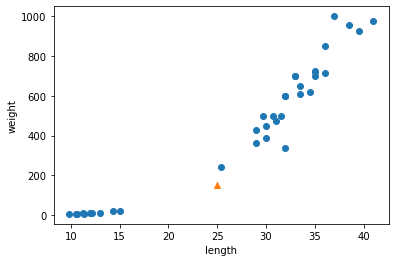

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**테스트할 도미데이터와 이웃하는 데이터들**

In [33]:
# kneighbors(data) : 거리상으로 근접한 이웃의 정보를 반환
dist,idx=kn.kneighbors([[25,150]]) # kn.n_neighbors=5 기본값

In [34]:
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [35]:
print(idx)

[[21 33 19 30  1]]


In [36]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

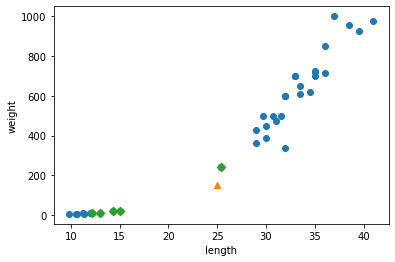

In [37]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


[[1. 0. 0. 0. 0.]]


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

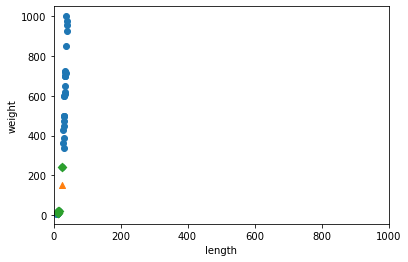

In [42]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- 최근접이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
- 거리 계산 시 자료의 값이 큰 변수에 더 큰 영향을 받게 됨

### 두 변수의 스케일을 갖게
- 표준점수(Z-Score)
    - 표준 점수는 통계학적으로 정규분포를 만들고 개개의 경우가 표준편차상에 어떤 위치를 차지하는지를 보여주는 차원없는 수치이다. 
    - 표준값, Z값, Z 점수이라고도 한다. 
    - 학력고사 등의 평가에서 개개인의 성적이 전체에서 어떤 위치를 차지하는지를 보여주기 위해 쓰이기도 한다.
    - 원점수 - 평균 / 표준편차


In [43]:
mean=np.mean(train_input,axis=0)

In [44]:
std=np.std(train_input,axis=0)

In [46]:
train_scaled=(train_input-mean)/std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


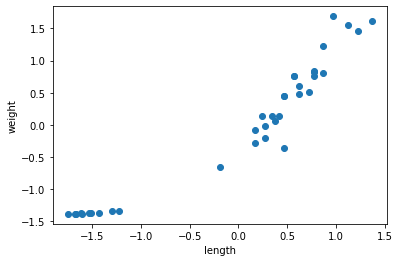

In [47]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# x축과 y축의 범위가 같아짐

### 전처리 데이터로 모델 훈련하기

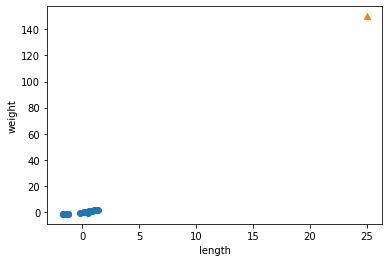

In [48]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**테스트 데이터도 스케일링**

In [58]:
# 테스트 데이터의 전처리는 학습데이터에서 사용한 값들을 이용해서 전처리를 진행
new=([25,150]-mean)/std
new

array([-0.23012627, -0.94060693])

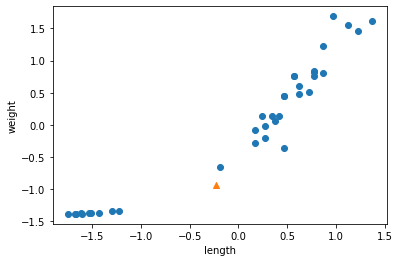

In [57]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [59]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [60]:
# 예측할 데이터 스케일링
test_scaled=(test_input-mean)/std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [61]:
kn.score(test_scaled,test_target)

1.0

In [63]:
kn.predict([new]) # new데이터는 도미로 예측됨

array([1.])

In [64]:
# new데이터는 idx14,15,21,32,34데이터와 근접한 데이터임
dist,idx=kn.kneighbors([new])
print(dist,idx) - # 스케일링 전 이웃 인덱스 35이하의 도미데이터에만 가까움

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


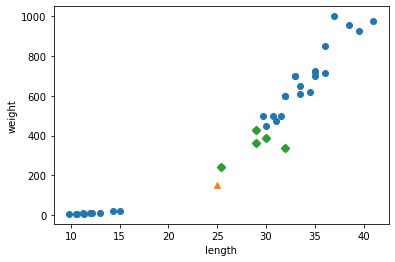

In [65]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
